# Gender Classification using Deep Learning

## 1. Objective

The objective of this project is to build a Convolutional Neural Network (CNN) that can classify images of humans as male or female. 
The model should be efficient, accurate, and deployable, with proper visualizations to understand performance.

## 2. Import Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
import tensorflow

In [138]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import L2

## 3. Design Model Architecture

In [140]:
cnn=Sequential()

In [141]:
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.25))


cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

In [142]:

cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))


## 4. Model Compilation

In [144]:
cnn.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

## 5. Data Loading & Preprocessing &  Model Training

In [146]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
    rotation_range=15,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'E:\Deep Learning\Datasets\Images Dataset\Man-Woman\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        r'E:\Deep Learning\Datasets\Images Dataset\Man-Woman\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

cnn.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
         epochs=50,
        validation_data=test_generator,
        validation_steps=test_generator.samples // test_generator.batch_size,
        callbacks=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.6083 - loss: 0.7143 - val_accuracy: 0.5031 - val_loss: 1.1016
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6250 - loss: 0.6052 - val_accuracy: 0.4938 - val_loss: 1.1461
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.6987 - loss: 0.5728 - val_accuracy: 0.4938 - val_loss: 1.9623
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7812 - loss: 0.4163 - val_accuracy: 0.5063 - val_loss: 1.9399
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.8010 - loss: 0.4391 - val_accuracy: 0.4875 - val_loss: 1.9861
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8438 - loss: 0.4581 - val_accuracy: 0.4844 - val_loss: 2.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.8275 - loss: 0.4054 - val_accuracy: 0.4969 - val_loss: 1.7104
Epoch 8/50
50/50 ━━━

## 6. Model Evaluation

In [160]:
loss, acc = cnn.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {acc * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9125 - loss: 0.2078
Test Accuracy: 91.25%


In [161]:
train_loss, train_acc = cnn.evaluate(
    train_generator,
    steps=train_generator.samples // train_generator.batch_size
)
print(f"Train Accuracy: {train_acc * 100:.2f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9362 - loss: 0.1567
Train Accuracy: 93.62%


In [162]:
history = cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.9166 - loss: 0.1911 - val_accuracy: 0.9000 - val_loss: 0.2387
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9375 - loss: 0.2411 - val_accuracy: 0.9000 - val_loss: 0.2456
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9084 - loss: 0.2131 - val_accuracy: 0.8687 - val_loss: 0.3865
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8125 - loss: 0.2220 - val_accuracy: 0.8813 - val_loss: 0.3232
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9172 - loss: 0.2141 - val_accuracy: 0.8844 - val_loss: 0.2650
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9375 - loss: 0.1370 - val_accuracy: 0.8906 - val_loss: 0.2399
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.9274 - loss: 0.1802 - val_accuracy: 0.9250 - val_loss: 0.1834
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8750 - loss: 0.2288 - val_accuracy: 0.

## 7. Model Training Visualization

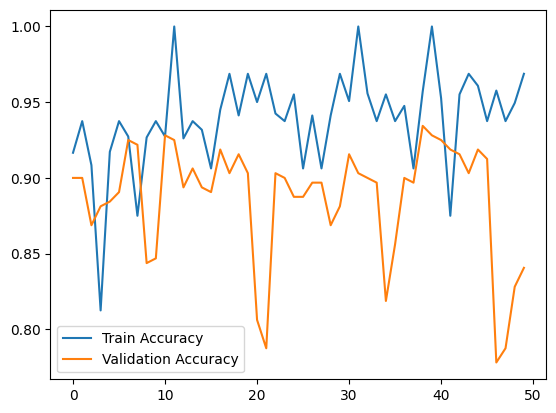

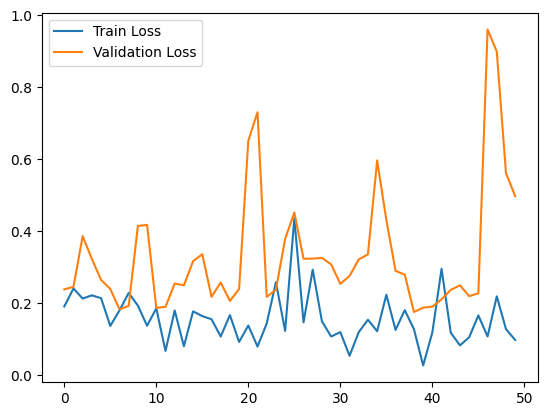

In [163]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## 8. Prediction

In [173]:
from keras.preprocessing import image
img=image.load_img(r"E:\Deep Learning\Datasets\Images Dataset\Man-Woman\test\man\face_22.jpg", target_size=(64, 64))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
p=cnn.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [176]:
if p[0][0]>=0.5:
    print("women")
else:
    print("man")

man


---